In [1]:
import numpy as np
from scipy.integrate import odeint
from math import factorial
import pylab as pl
%matplotlib inline

In [8]:
lcap = 6e-9
R0   = 2.84984057e-09
cinf = 55.33
cs   = 5.53e-2
Vm   = 3.29e-5
D    = 3.01e-18
k    = 7.97e-10
N0   = 8.04e21
beta = 4 * np.pi * N0 * R0**3 / (3 * Vm)
Da1  = D/(k*R0)

# Order of trunction for exponential:
n = 2

In [9]:
delta_C = cinf - cs * np.exp(lcap/R0)
t0      = R0**2 / (Vm * D * delta_C)

In [25]:
# Data from the peng paper
data = np.loadtxt('peng.txt', delimiter=',')

In [26]:
def dx_dt(x, t, Da):
    csolute = cinf - np.sum(beta * (x**(1/(n+1)))**3)
    expapprox = x**(n/n+1)
    for i in range(1, n+1):
        expapprox += lcap**i / factorial(i) * x**((n-i)/(n+1))
    dxdt = (n+1) * (csolute * x**(n/n+1) - cs * expapprox)/(delta_C * (Da + (x**(1/(n+1))/R0)))
    return dxdt

In [27]:
t = np.linspace(0, 10, 1000)

In [34]:
Rinit = 1
xinit = (Rinit * R0)**(n+1)
sol1  = odeint(dx_dt, xinit, t, args = (Da1,), rtol = 1e-8)

/home/hyperion/miniconda3/envs/bolt/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
/home/hyperion/miniconda3/envs/bolt/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """
/home/hyperion/miniconda3/envs/bolt/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  


Text(0, 0.5, '$R$(in nm)')

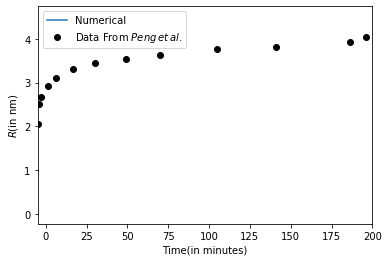

In [29]:
pl.plot(t * t0 / 60, sol1 * R0 / 1e-9, label = 'Numerical')
pl.plot(data.T[0], data.T[1], 'ko', label = r'Data From $\it{Peng\,et\,al.}$')
pl.xlim(-5, 200)
pl.legend()
pl.xlabel('Time(in minutes)')
pl.ylabel(r'$R$(in nm)')

In [33]:
dx_dt(xinit, 1, Da1)

-4.563474045697295e-20

In [11]:
print(D)
print(k)
print(cs)
print(N0)
print()
print(beta)
print(Da1)
print(delta_C)
print(t0)

3.01e-18
7.97e-10
0.0553
8.04e+21

23.692476270869143
1.3252188645472844
54.875974282836694
1494.501970672384
